In [3]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [15]:
data = pd.read_csv("/Users/James/Desktop/projects/countries/countries.csv",usecols=[i for i in range(1,12)])
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Happiness
0,Switzerland,188.36,102.77,78.38,74.08,125.02,8.18,28.67,19.86,80.05,7.560
1,Denmark,186.25,86.43,73.78,79.79,88.53,7.00,28.69,21.29,81.80,7.646
2,Netherlands,180.27,76.65,72.84,75.28,78.93,7.28,27.64,25.39,87.00,7.449
3,Finland,178.95,80.11,72.41,76.19,76.35,8.57,28.91,11.99,56.64,7.809
4,Australia,178.41,91.07,56.97,77.86,80.75,7.27,34.81,23.69,92.70,7.223


In [16]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Country,Quality of Life,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate,Happiness
0,Brazil,104.70,25.13,32.51,57.79,36.06,15.96,41.39,54.40,95.41,6.376
1,Spain,163.48,58.50,66.68,78.85,56.64,9.22,29.28,39.73,93.65,6.401
2,Belgium,148.18,70.12,55.42,75.37,75.79,7.01,36.82,50.09,86.03,6.864
3,Sri Lanka,75.52,18.43,58.61,72.72,30.41,38.56,56.74,59.97,59.11,4.327
4,Kenya,76.92,25.37,39.86,57.53,35.82,27.05,56.39,75.92,99.79,4.583


In [24]:
data.dtypes

Country                      object
Quality of Life             float64
Purchasing Power            float64
Safety                      float64
Healthcare                  float64
Cost of Living              float64
Property Price to Income    float64
Traffic Commute Time        float64
Pollution                   float64
Climate                     float64
Happiness                   float64
dtype: object

In [25]:
frac = 0.7

In [26]:
x, test_x = data.iloc[:,2:10][:round(len(data)*frac)],data.iloc[:,2:10][round(len(data)*frac):]
x.head(5)


,Purchasing Power,Safety,Healthcare,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Climate
0,25.13,32.51,57.79,36.06,15.96,41.39,54.40,95.41
1,58.50,66.68,78.85,56.64,9.22,29.28,39.73,93.65
2,70.12,55.42,75.37,75.79,7.01,36.82,50.09,86.03
3,18.43,58.61,72.72,30.41,38.56,56.74,59.97,59.11
4,25.37,39.86,57.53,35.82,27.05,56.39,75.92,99.79


In [27]:
y, test_y = data.iloc[:,10][:round(len(data)*frac)],data.iloc[:,10][round(len(data)*frac):]
y.head(5)

0    6.376
1    6.401
2    6.864
3    4.327
4    4.583
Name: Happiness, dtype: float64

### Decision Tree regression

In [28]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(x,y)

In [29]:
pred = clf.predict(test_x)
pred[:10]

array([7.17947059, 7.17947059, 5.69388889, 5.69388889, 6.062     ,
       6.062     , 5.8715    , 6.062     , 6.062     , 5.69388889])

In [30]:
act = np.array(test_y)
act[:10]

array([7.129, 6.102, 5.975, 5.132, 6.387, 5.911, 6.377, 4.633, 5.515,
       5.165])

In [31]:
np.sum(np.abs(act-pred)<=0.1*pred)/len(test_y)

0.7916666666666666

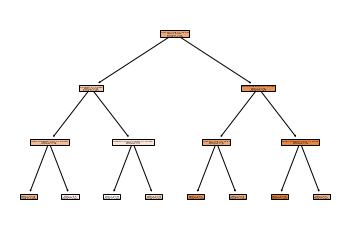

In [35]:
import matplotlib.pyplot as plt
plt.figure()
tree.plot_tree(clf,feature_names=x.columns,filled=True)
plt.savefig('tree.eps',format='eps',bbox_inches = "tight")

In [34]:
x.columns

Index(['Purchasing Power', 'Safety', 'Healthcare', 'Cost of Living',
       'Property Price to Income', 'Traffic Commute Time', 'Pollution',
       'Climate'],
      dtype='object')

### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_test_x = scaler.transform(test_x)

reg = LinearRegression(normalize=True,fit_intercept=True).fit(std_x, y)

In [82]:
import statsmodels.api as sm
X = sm.add_constant(std_x)
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     12.65
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           2.14e-09
Time:                        15:49:05   Log-Likelihood:                -44.697
No. Observations:                  55   AIC:                             107.4
Df Residuals:                      46   BIC:                             125.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1195      0.080     76.101      0.0

In [78]:
pred = reg.predict(std_test_x)
print("predictions: {}".format(pred[:5]))
act = np.array(test_y)
print("actual: {}".format(act[:5]))
print("countries: {}".format(np.array(data.iloc[round(len(data)*frac):round(len(data)*frac)+5,0])))

predictions: [6.67315886 5.70369411 5.58429786 5.58400453 6.5218854 ]
actual: [7.129 6.102 5.975 5.132 6.387]
countries: ['Ireland' 'Kuwait' 'Argentina' 'Turkey' 'Italy']


In [79]:
np.sum(np.abs(act-pred)<=0.1*pred)/len(test_y)

0.8333333333333334

In [80]:
reg.coef_

array([-0.18660754, -0.06899562,  0.17062704,  0.4996305 , -0.18855761,
       -0.09581095, -0.31642462, -0.05122813])

In [65]:
x.columns

Index(['Purchasing Power', 'Safety', 'Healthcare', 'Cost of Living',
       'Property Price to Income', 'Traffic Commute Time', 'Pollution',
       'Climate'],
      dtype='object')

In [81]:
reg.intercept_

6.119472727272727